### 1 Laden Sie die Trainingsdaten

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [53]:
pd.set_option('display.max_columns', None)  # Zeige alle Spalten

In [54]:
df_raw_transaction_data = pd.read_csv(r"data/train.csv", delimiter=';')
print(df_raw_transaction_data.head())

   transactionId                 basket customerType  totalAmount  returnLabel
0     9534310106              [4, 3, 4]          new        252.0            1
1     7202594767        [4, 2, 0, 2, 5]     existing         70.0            0
2     2737331698                    [5]     existing         84.0            0
3     4868011733           [1, 4, 2, 4]     existing        116.0            0
4     7622406570  [2, 5, 3, 2, 3, 2, 0]     existing        378.0            0


### 2 EDA 

In [62]:
nan_values = df_raw_transaction_data.isna().sum()
print(nan_values)
nan_values = nan_values.sum()
print(f'Der Datensatz enthält {nan_values} NaN-Werte.')

transactionId      0
basket             0
customerType     442
totalAmount      477
returnLabel        0
dtype: int64
Der Datensatz enthält 919 NaN-Werte.


In [56]:
df_raw_transaction_data.describe()

,transactionId,totalAmount,returnLabel
count,2.240000e+04,21923.000000,22400.000000
mean,5.498836e+09,259.056014,0.296964
std,2.594620e+09,217.299439,0.456931
min,1.000405e+09,10.000000,0.000000
25%,3.269971e+09,86.000000,0.000000
50%,5.484690e+09,204.000000,0.000000
75%,7.752266e+09,370.000000,1.000000
max,9.999530e+09,1976.000000,1.000000


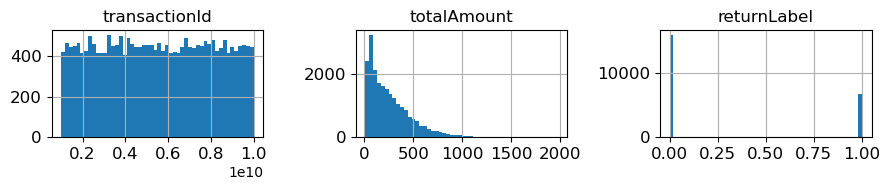

In [57]:
df_raw_transaction_data.hist(figsize=(15, 2), bins=50, xlabelsize=12, ylabelsize=12, layout=(1, len(df_raw_transaction_data.columns)))
plt.tight_layout()
plt.show()

### 3 Fehlende Werte auffüllen

In [58]:
nan_values = df_raw_transaction_data.isna().sum().sum()
print(f'Der Datensatz enthält {nan_values} NaN-Werte.')

#age_mean = X_train['Age'].mean()
#print("Age mean:", age_mean)
#X_train['Age'] = X_train['Age'].fillna(age_mean)
#X_train.isna().sum()

Der Datensatz enthält 919 NaN-Werte.


### 4 One-hot-encoding

In [59]:
df_transaction = pd.get_dummies(df_raw_transaction_data, columns=['customerType'])
# df_transaction drop colum customerType_new
df_transaction = df_transaction.drop(columns=['customerType_new'])
print(df_transaction.head())

   transactionId                 basket  totalAmount  returnLabel  customerType_existing
0     9534310106              [4, 3, 4]        252.0            1                  False
1     7202594767        [4, 2, 0, 2, 5]         70.0            0                   True
2     2737331698                    [5]         84.0            0                   True
3     4868011733           [1, 4, 2, 4]        116.0            0                   True
4     7622406570  [2, 5, 3, 2, 3, 2, 0]        378.0            0                   True


In [63]:
basket_matrix = pd.DataFrame(0, index=df_transaction.index, columns=[f'item_{i}' for i in range(6)])

for index, row in df_transaction.iterrows():
    basket = row['basket']
    basket = basket[1:-1].split(',')
    for item in basket:
        item = int(item)
        if item == 0:
            basket_matrix.at[index, f'item_{item}'] += 1
        elif item == 1:
            basket_matrix.at[index, f'item_{item}'] += 1
        elif item == 2:
            basket_matrix.at[index, f'item_{item}'] += 1
        elif item == 3:
            basket_matrix.at[index, f'item_{item}'] += 1
        elif item == 4:
            basket_matrix.at[index, f'item_{item}'] += 1 
        elif item == 5:
            basket_matrix.at[index, f'item_{item}'] += 1

df_final = pd.concat([df_transaction, basket_matrix], axis=1)

df_final = df_final.drop('basket', axis=1)
df = df_final.drop('transactionId', axis=1)

print(df.head())

   totalAmount  returnLabel  customerType_existing  item_0  item_1  item_2  item_3  item_4  item_5
0        252.0            1                  False       0       0       0       1       2       0
1         70.0            0                   True       1       0       2       0       1       1
2         84.0            0                   True       0       0       0       0       0       1
3        116.0            0                   True       0       1       1       0       2       0
4        378.0            0                   True       1       0       3       2       0       1


### 5 Features bauen

In [ ]:
# Features bauen
# totalAmount  returnLabel  customerType_existing  item_0  item_1  item_2  item_3  item_4  item_5
#       252.0            1                  False       0       0       0       1       2       0
#        70.0            0                   True       1       0       2       0       1       1
#        84.0            0                   True       0       0       0       0       0       1
#       116.0            0                   True       0       1       1       0       2       0
#       378.0            0                   True       1       0       3       2       0       1

Gesamtanzahl der Artikel

Durchschnittspreis pro Artikel

### 6 Skalieren

### 7. Klassifikationsmodelle Trainieren

### 8. Laden der Testdaten

### 9. Entfernen Sie alle Zeilen mit fehlenden Werten.

### 10. Transformieren Sie die Attribute genauso wie bei den Trainingsdaten.

### 11. Skalieren Sie die Daten im gleichem Maß wie die Trainingsdaten.

### 12. Machen Sie eine Vorhersage auf den Testdaten mit allen drei Modellen und den jeweils besten Hyperparametern aus der Cross Validation.

### 13. Berechnen Sie für jedes der drei Modell Accuracy, Precision und Recall.

### 14. Berechnen Sie außerdem die Accuracy auf den Trainingsdaten und vergleichen Sie Accuracy auf Trainings- und Testdaten. Liegt Overfitting vor? (Unterschied > 5%)

###  15. Untersuchen Sie wieviele Datenpunkte es in den Testdaten gibt, welche von allen drei Modellen falsch klassifiziert wurden: 
### 1. Bestimmen Sie für jedes der drei Modelle die Indizes der Testdatenpunkte auf welchen das jeweilige Modell falsch klassifiziert hat. 
### 2. Nutzen Sie die set-Klasse in Python um die Anzahl an Datenpunkten zu bestimmen, welche von allen drei Modellen falsch klassifiziert wurden.

### 16. Vergleichen Sie die Feature-Importances der drei Modelle.